# The Strategy DP & the Iterator DP #

### Richard Mather ###

### October, 2021 ###

## This unit introduces two 'Behavioural' Design Patterns ##

## Both <font color="red">Strategy</font> and <font color="red">Iterator</font> have object-level scope ##

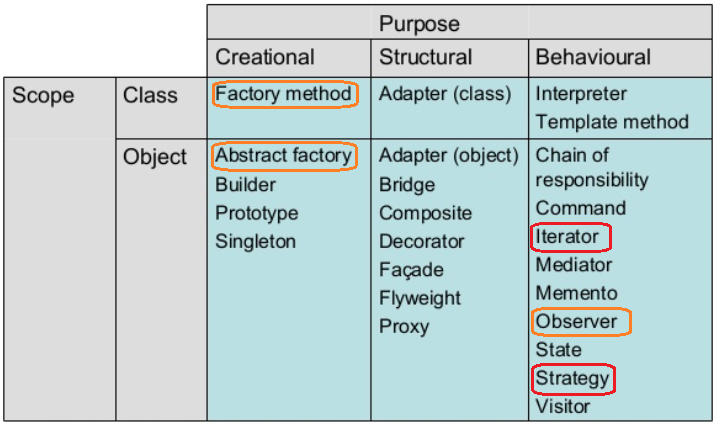


## At the end of this unit there are <font color="red">two logbook exercises for you to complete</font>  ##


## The Strategy Design Pattern ##
### An object behavioural pattern ###

### Intent: ### 
"Define a family of algorithms, encapsulate each one, and make them interchangeable. Strategy lets the algorithm vary independently from clients that use it" (Gamma et al., 1995) 

- Use this when classes differ only in their behaviour ... provide a means for configuring a class with one of many behaviours
- Have many uses including line-break strategies across different platforms, the application of different financial forecast instruments, different strategies may be applied to GUI dialog boxes to ensure users enter valid data


### Structure ###

This is the generalised structure as presented in Gamma et al. (1995)

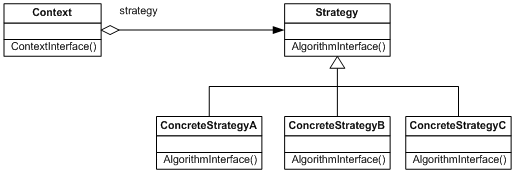

### Consequences ###

- Useful for implementing families of related algorithms
- It is an alternative to sub-classing (which statically hardwires behaviour) and thereby allow strategies to vary dynamically
- Strategies remove the need for conditional statements
- Particularly powerful in Python where there is no need to create classes for each strategy as these may be represented as different First Class functions that may be passed to the same Strategy class/object ... see example below

### Implementation ###

One worked example is provided and this is used as a template for a logbook exercise where by 'varying' strategies you demonstrate the capability of the OpenCV computer-vision library. 
- Jungwoo Ryoo's example is typically concise and (as for his Factory Method) again exploits: (a) Python's <font color="red">dynamic duck-typing</font> to avoid having to implement interfaces ... i.e. if it has a quack() method then just call it; and (b) Python's <font color="red">First Class functions</font> to avoid having to wrap the factory method in a class (https://www.lynda.com/Python-tutorials/Strategy-example/369187/419208-4.html)<br>

- Here the <font color="red">types</font> module is needed to support dynamic creation of new types
- In the case below new method types are dynamically created:
 - ... the default "execute()" method 
 - ... which may be replaced by "strategy_one()" or "strategy_two()"
- The differences to the GoF version of the Strategy DP include:
 - although performing the role of placeholder for ***AlgorithmInterface***, the ***Strategy*** entity is both concrete and capable of resolving ***ANY*** replacement method ... i.e. almost a *super* strategy  
 - there are no **ConcreteStrategyA/B/C** class entities. These are not needed in Python as 'bare' First Class function methods **strategy_one()** and **strategy_two()** perform the strategy alternatives perfectly adequately.
 - The ***execute(...)*** method on **Strategy** is both a concrete replacement and an abstraction for resolving all algorithms 
 

In [9]:
# Example from Jungwoo Ryoo (2015)

# The 'types' module is needed to support dynamic creation of new types. In this case we dynamically create 
# ... a new method type
import types #Import the types module

# Although 'concrete' this performs the role of the Strategy interface in the GoF example 
class Strategy:
    """The Strategy Pattern class"""
    
    def __init__(self, function=None):
        self.name = "Default Strategy"
        
        #If a reference to a function is provided, replace the execute() method with the given function
        if function:
            # When a new method is added with MethodType (from the 'types' module) this dynamically 
            # ... binds/maps the new method 
            # ... at runtime so that behaves like a normal Python method for the Strategy object 
            self.execute = types.MethodType(function, self)
            
    # Although 'concrete' this performs an equivalent role to the GoF "AlgorithmInterface()"
    def execute(self): #This gets replaced by another version if another strategy is provided.
        """The defaut method that prints the name of the strategy being used"""
        print("{} is used!".format(self.name))

# Replacement method 1 - this is a concrete implementation of 'AlgorithmInterface'
def strategy_one(self):
    print("{} is used to execute method 1".format(self.name))

# Replacement method 2 - this is a concrete implementation of 'AlgorithmInterface'
def strategy_two(self):
    print("{} is used to execute method 2".format(self.name))
    
# Let's create our default strategy
s0 = Strategy()
# Let's execute our default strategy
s0.execute()

# Let's create the first variation of our default strategy by providing a new behavior
s1 = Strategy(strategy_one)
# Let's set its name
s1.name = "Strategy One"
# Let's execute the strategy
s1.execute()

s2 = Strategy(strategy_two)
s2.name = "Strategy Two"
s2.execute()

Default Strategy is used!
Strategy One is used to execute method 1
Strategy Two is used to execute method 2


## The Iterator Design Pattern ##
### An object behavioural pattern ###


### Intent: ### 
"Provide a way to access the elements of an aggregate object sequentially without exposing its underlying representation" (Gamma et al., 1995) 

- Aggregate objects (arrays, lists and other sequences/collections) need methods for access to elements and for different types of traversal  
- However you don't really want to bloat a List (or other collection) interface with these methods
- At one level of abstraction you can assign data and access/traversal methods to separate objects - e.g. List and ListIterator (see below)

![listIterator.png](attachment:listIterator.png)
- The Iterator DP provides a solution for keeping the data object separate from access/traversal methods

- ... but this still couples the aggregate object (a list) to its specific ListIterator and "the client must know that it is a *list* that's traversed as opposed to some other aggregate structure" (Gamma et al., 1995)
- The Iterator DP provides a <font color="red">polymorphic iteration</font> solution for changing the 'aggregate' class without having to change the client code
- The Iterator DP abstracts both the Iterator functions (first/next/isDone/currentItem) and *AbstractList/Collection* functions (createIterator/count/append/remove) to an interface/abstract class (see below)
- NOTE: The responsibility *CreateIterator* is devolved to concrete classes to instantiate the iterator approriate to the aggregate object (ahh ... this looks like a *Factory Method DP* then!)
- Iterators are so essential they are built into many languages and Dusty Phillips (2015) nicely explains their role as follows ...

*In typical design pattern parlance, an iterator is an object with a ```next()``` method and a ```done()``` method; the latter returns ```True``` if there are no items left in the sequence. In a programming language without built-in support for iterators, the iterator would be looped over like this:*

```    
        while not iterator.done():
            item = iterator.next()
            # do something with the item
```            
*In Python, iteration is a special feature, so the method gets a special name, ```__next__```. This method can be accessed using the ```next(iterator)``` built in. Rather than a ```done``` method, the iterator raises ```StopIteration``` to notify the loop that it has completed. Finally, we have the much more readable ```for item in iterator``` syntax to actually access items in an iterator instead of messing around with a ```while``` loop.*

### Structure ###

This is the generalised structure as presented in Gamma et al. (1995)

![iteratorDP.png](attachment:iteratorDP.png)


### Consequences ###

Consequences of using the Iterator DP are mostly positive:

- It supports different types of traversal - e.g. complex aggregates may be easily treated with different traversal algorithms
- Iterators simplify the interface of the aggregate object
- Iterators decouple client code from iterator implementations
 

### Implementation ###

- Because iterators are embedded in most OO languages, developers are more usually consumers of Iterator DPs rather than having to engineer them

#### Example [1] below is derived from multiple sources #### 
- It really serves as evidence of the presence of the **Iterator DP** by: 
 - demonstrating *client* code and the application of 3x *concrete iterator* implementations applied to a *concrete list* 
 - demonstrating the behaviour of two iterators - the *zip* tuple iteratorand the *generator* (iterable list of items) iterator
- The first two iterator implementations/variations return/yield *generator* iterable objects that 'yield' next items
- Generators are simple functions which avoid loading large collections into memory - they just remember 
- ... where they are in the collection and yield that item before moving on to the next
- Return simply returns the value after the function call, 
 - ... and it will not allow you to do anything else after the return statement. ... 
 - ... yield returns a value only once, and the next time you call the same function 
 - ... it will move on to the next yield statement. Also in generators we always get the object as output
 
- With a *generator* you can either use a for loop or call *next()* 
- The third iterator returns a *zip* object
- Both *zip* and *generator* objects are iterable using ``` for element in collection: ``` 
- ``` for element in collection: ``` uses next() and the *StopIteration* (in other languages *IsDone*) protocols but hide these
- The final two examples demonstrate using both zip and generator objects with two elements by ...
 - illustrating by application the presence of a *next()* method
 - and catching the *StopIteration* exception when a call to a non-existant third element is made
 
#### Example [2] is a logbook exercise and is a simple demonstration of the Python __iter__() function
- The ```__iter__()``` function returns an iterator object that goes through the each element of the given object. 
- The next element can be accessed through ```__next__()``` function.
- ```__iter__()``` can be applied to many aggregate objects (lists, sets, tuples etc and other custom objects)

```
mylist = ['item1', 'item2', 'item3'] 
  
iter_mylist = iter(mylist) 
  
try: 
    print(next(iter_mylist))  
    print(next(iter_mylist))  
    print(next(iter_mylist))
    # Exceeds number of items so should raise StopIteration exception
    print( next(iter_mylist)) 
except Exception as e:
    print(e)
    print(sys.exc_info())
```

In [10]:
import sys

# CONCRETE ITERATOR 1
# uses numberItems and list of books to create an iterator of tuples of numberItems length and yields (like return a generator  
def special_iterator1(numberItems, _list):    
    # zip returns an object which is an iterator of tuples 
    # ... such as ((1,"Anna Karenina by Leo Tolstoy"), (2,"Madame Bovary by Gustave Flaubert"))
    tupleIterator = zip(range(numberItems), _list)
    
    # Iterate over the iterable tuple and extract the 'top books'
    # ... insert them in a generator named _generator
    for position, _generator in tupleIterator:
        # Return the selected items in a generator
        # Generators are objects and simple functions which return an iterable set of items
        # Return simply returns the value after the function call, 
        # ... and it will not allow you to do anything else after the return statement. ... 
        # ... yield 'returns' a value only once, and the next time you call the same function 
        # ... it will move on to the next yield statement. Also in generators we always get the object as output
        yield _generator

# CONCRETE ITERATOR 2
# Use range parameters to select beginning, end and every nth items - this yields items from the 'tupleIterator' 
def special_iterator2(start, stop, step, _list):
    # NOTE: syntax for returning elements in _list with start, end and steps in a sequence 
    tupleIterator = zip(range(start, stop, step), _list[start:stop:step])
    for position, _generator2 in tupleIterator:
        yield _generator2

# CONCRETE ITERATOR 3
# Use range parameters to select beginning, end and every nth items - returns the entire 'tupleIterator' and tuple contents
def special_iterator3(start, stop, step, _list):
    tupleIterator = zip(range(start, stop, step), _list[start:stop:step])
    return tupleIterator
        
top10books=["Anna Karenina by Leo Tolstoy", "Madame Bovary by Gustave Flaubert", "War and Peace by Leo Tolstoy", 
           "Lolita by Vladimir Nabokov", "The Adventures of Huckleberry Finn by Mark Twain", "Hamlet by William Shakespeare",
           "The Great Gatsby by F. Scott Fitzgerald", "In Search of Lost Time by Marcel Proust", 
           "The Stories of Anton Chekhov by Anton Chekhov", "Middlemarch by George Eliot"]

print("\nOutput from special_iterator1\n")
# Inspect the generator returned by iterator 1
for item in special_iterator1(7, top10books):
    print("{}".format(item))

# Inspect the generator returned by iterator 2
print("\nOutput from special_iterator2\n")
for item in special_iterator2(3,7,2, top10books):
    print("{}".format(item))

# Inspect the tuple returned by iterator 3
print("\nOutput from special_iterator3\n")
for item in special_iterator3(3,7,2, top10books):
    print("{}".format(item))


# Demonstrate ubiquitous next() and IsDone() (in Python's case StopIteration 'error') of Iterator DPs in a generator iterator
print("\nOutput from GENERATOR using next() and observing StopIteration\n")
s_i_generator = special_iterator2(3,7,2, top10books)
try:
    print("This GENERATOR item is {} ... ".format(next(s_i_generator)))
    print("This GENERATOR item is {} ... ".format(next(s_i_generator)))
    print("This GENERATOR item is {} ... ".format(next(s_i_generator)))
except Exception as e:
    print(e)
    print(sys.exc_info())

# Demonstrate ubiquitous next() and done() (in Python's case StopIteration 'error') of Iterator DPs in a zip iterator (of tuples)
print("\nOutput from ZIP object (tuple iterator) using next() and observing StopIteration\n")
s_i_tuple = special_iterator3(3,7,2, top10books)
try:
    print("This ZIP item is {} ... ".format(next(s_i_tuple)))
    print("This ZIP item is {} ... ".format(next(s_i_tuple)))
    print("This ZIP item is {} ... ".format(next(s_i_tuple)))
except Exception as e:
    print(e)
    print(sys.exc_info())



Output from special_iterator1

Anna Karenina by Leo Tolstoy
Madame Bovary by Gustave Flaubert
War and Peace by Leo Tolstoy
Lolita by Vladimir Nabokov
The Adventures of Huckleberry Finn by Mark Twain
Hamlet by William Shakespeare
The Great Gatsby by F. Scott Fitzgerald

Output from special_iterator2

Lolita by Vladimir Nabokov
Hamlet by William Shakespeare

Output from special_iterator3

(3, 'Lolita by Vladimir Nabokov')
(5, 'Hamlet by William Shakespeare')

Output from GENERATOR using next() and observing StopIteration

This GENERATOR item is Lolita by Vladimir Nabokov ... 
This GENERATOR item is Hamlet by William Shakespeare ... 

(<class 'StopIteration'>, StopIteration(), <traceback object at 0x11058bf40>)

Output from ZIP object (tuple iterator) using next() and observing StopIteration

This ZIP item is (3, 'Lolita by Vladimir Nabokov') ... 
This ZIP item is (5, 'Hamlet by William Shakespeare') ... 

(<class 'StopIteration'>, StopIteration(), <traceback object at 0x11591c440>)


## <font color="red">Logbook Exercise 10</font> ##

- Modify Jungwoo Ryoo's Strategy Pattern to showcase ***OpenCV*** capabilities with different image processing strategies
- We will use the ***OpenCV*** (Open Computer Vision) library which has been reproduced with Python bindings
- OpenCV has many standard computer science image-processing filters and includes powerful AI machine learning algorithms
- The following resources provide more information on OpenCv with Python ...
 - Beyeler, M. (2015). OpenCV with Python blueprints. Packt Publishing Ltd.
 - Joshi, P. (2015). OpenCV with Python by example. Packt Publishing Ltd.
 - The cartoon effect is from http://www.askaswiss.com/2016/01/how-to-create-cartoon-effect-opencv-python.html and https://www.tutorialspoint.com/cartooning-an-image-using-opencv-in-python

### Development stages ###
- Install the OpenCV package - we have to do this manually ...
 - Start Anaconda Navigator
 - From Anaconda run the CMD.exe terminal
 - At the prompt type ... ``` conda install opencv-python ```
 - The process may pause with a prompt ... ```Proceed ([y]/n)?``` ... just accept this ... ```y```
- Copy Jungwoo Ryoo's code to a code cell below this one
- As well as the ***types*** module you will need to provide access to OpenCV and numpy as follows
```
    # Import OpenCV
    import cv2
    import numpy as np
```
- Please place a copy of clouds.jpg in the same directory as your Jupyter logbook 
- The code for each strategy and some notes on implementing these are below ...
- The output should look something like this ... but if you wish feel free to experiment with something else ... cats etc.!
![strategy_images.png](attachment:strategy_images.png)

### Implementing image processing strategies ###

- There will be six strategy objects s0-s5, where s0 is the default strategy of the **Strategy** class
- Instead of assigning a name to each strategy object, you will need to reference the image to be processed - 'clouds.jpg'
 - i.e. s0.image = "clouds.jpg"
- The *body* code for each strategy is below, you will need to provide the method signatures and their executions


#### strategy s0 ####

The default ***execute()*** method that simply displays the image sent to it 

```
        print("The image {} is used to execute Strategy 0 - Display image".format(self.image))
        img_rgb = cv2.imread(self.image)
        cv2.imshow('Image', img_rgb)
```

#### strategy s1 ####

This converts a colour image into a mononochrome one - suggested strategy method name is ***strategy_greyscale***

```
    img_rgb = cv2.imread(self.image)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    cv2.imshow('Greyscale image', img_gray)
    
```

#### strategy s2 ####

This applies a blur filter to an image - suggested strategy method name is ***strategy_blur***

```
    img_rgb = cv2.imread(self.image)
    img_blur = cv2.medianBlur(img_rgb, 7)
    cv2.imshow('Blurred image', img_blur)

```

#### strategy s3 ####

This produces a colour negative image from a colour one - suggested strategy method name is ***strategy_colNegative***

```
  img_rgb = cv2.imread(self.image)
    for x in np.nditer(img_rgb, op_flags=['readwrite']):
        x[...] = (255 - x)
    cv2.imshow('Colour negative', img_rgb)

```

#### strategy s4 ####

This produces a monochrome negative image from a colour one - suggested strategy method name is ***strategy_greyNegative***

```
    img_rgb = cv2.imread(self.image)
    img_grey = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    for x in np.nditer(img_grey, op_flags=['readwrite']):
        x[...] = (255 - x)
    cv2.imshow('Monochrome negative', img_grey)
```

#### strategy s5 ####

This produces a cartoon-like effect - suggested strategy method name is ***strategy_cartoon***

```
    #Use bilateral filter for edge smoothing.
    num_down = 2 # number of downsampling steps
    num_bilateral = 7 # number of bilateral filtering steps
    img_rgb = cv2.imread(self.image)
    # downsample image using Gaussian pyramid
    img_color = img_rgb
    for _ in range(num_down):
        img_color = cv2.pyrDown(img_color)
    # repeatedly apply small bilateral filter instead of applying one large filter
    for _ in range(num_bilateral):
        img_color = cv2.bilateralFilter(img_color, d=9, sigmaColor=9, sigmaSpace=7)
    # upsample image to original size
    for _ in range(num_down):
        img_color = cv2.pyrUp(img_color)
    #Use median filter to reduce noise convert to grayscale and apply median blur
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    img_blur = cv2.medianBlur(img_gray, 7)
    #Use adaptive thresholding to create an edge mask detect and enhance edges
    img_edge = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=2)
    # Combine color image with edge mask & display picture, convert back to color, bit-AND with color image
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
    img_cartoon = cv2.bitwise_and(img_color, img_edge)
    # display
    cv2.imshow("Cartoon-ised image", img_cartoon); cv2.waitKey(0); cv2.destroyAllWindows()

```

In [1]:
import cv2 as cv

In [2]:
import cv2 as cv

# In VSC, right click on the 'clouds.jpg' and then 'Copy Path'

img = cv.imread('YOUR_PATH_HERE/clouds.jpg',1)
cv.imshow('image',img)
cv.waitKey(10000)


-1

In [ ]:
# TO BE COMPLETED ...

# Example from Jungwoo Ryoo (2015)

# The 'types' module is needed to support dynamic creation of new types. In this case we dynamically create a new method type
import types #Import the types module

# Although 'concrete' this performs the role of the Strategy interface in the GoF example 
class Strategy:
    """The Strategy Pattern class"""
    
    def __init__(self, function=None):
        self.name = "Default Strategy"
        
        #If a reference to a function is provided, replace the execute() method with the given function
        if function:
            self.execute = types.MethodType(function, self)
            
    # Although 'concrete' this performs an equivalent role to the GoF "AlgorithmInterface()"
    def execute(self): #This gets replaced by another version if another strategy is provided.
        """The defaut method that prints the name of the strategy being used"""
        print("{} is used!".format(self.name))

# Replacement method 1 - this is a concrete implementation of 'AlgorithmInterface'
def strategy_one(self):
    print("{} is used to execute method 1".format(self.name))

# Replacement method 2 - this is a concrete implementation of 'AlgorithmInterface'
def strategy_two(self):
    print("{} is used to execute method 2".format(self.name))
    
# Let's create our default strategy
s0 = Strategy()
# Let's execute our default strategy
s0.execute()

# Let's create the first variation of our default strategy by providing a new behavior
s1 = Strategy(strategy_one)
# Let's set its name
s1.name = "Strategy One"
# Let's execute the strategy
s1.execute()

s2 = Strategy(strategy_two)
s2.name = "Strategy Two"
s2.execute()

Default Strategy is used!
Strategy One is used to execute method 1
Strategy Two is used to execute method 2


## <font color="red">Logbook Exercise 11</font> ##

- Demonstrate the use of ```__iter__()```, ```__next()__``` and ```StopIteration``` using ...
- ... the <font color="red">first four items from the top10books list</font> (see above) ... 
- ... and the following structure

```
mylist = ['item1', 'item2', 'item3'] 

iter_mylist = iter(mylist) 

try: 
    print( next(iter_mylist))  
    print( next(iter_mylist))  
    print( next(iter_mylist))
    # Exceeds numbe of items so should raise StopIteration exception
    print( next(iter_mylist)) 
except Exception as e:
    print(e)
    print(sys.exc_info())

```

In [ ]:
# TO BE COMPLETED ...

mylist = ['item1', 'item2', 'item3'] 

iter_mylist = iter(mylist) 

try: 
    print( next(iter_mylist))  
    print( next(iter_mylist))  
    print( next(iter_mylist))
    # Exceeds number of items so should raise StopIteration exception
    print( next(iter_mylist)) 
except Exception as e:
    print(e)
    print(sys.exc_info())

item1
item2
item3

(<class 'StopIteration'>, StopIteration(), <traceback object at 0x00000247EA97A8C0>)


###### References & Learning Resources#

- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Phillips D. (2015) Python 3 Object-oriented Programming - Second Edition. PACKT Publishing.
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley